# Income Level Prediction: Analysis of USA Census Data

# Introduction

 Analysis of USA census data containing 200,000 rows and 41 features using python programming.

# Project Objective

I will build a classification algorithm using logistic regression,at the end of this project I would have built a 
logistic regression model that can generalize and predict the income level of citizens.

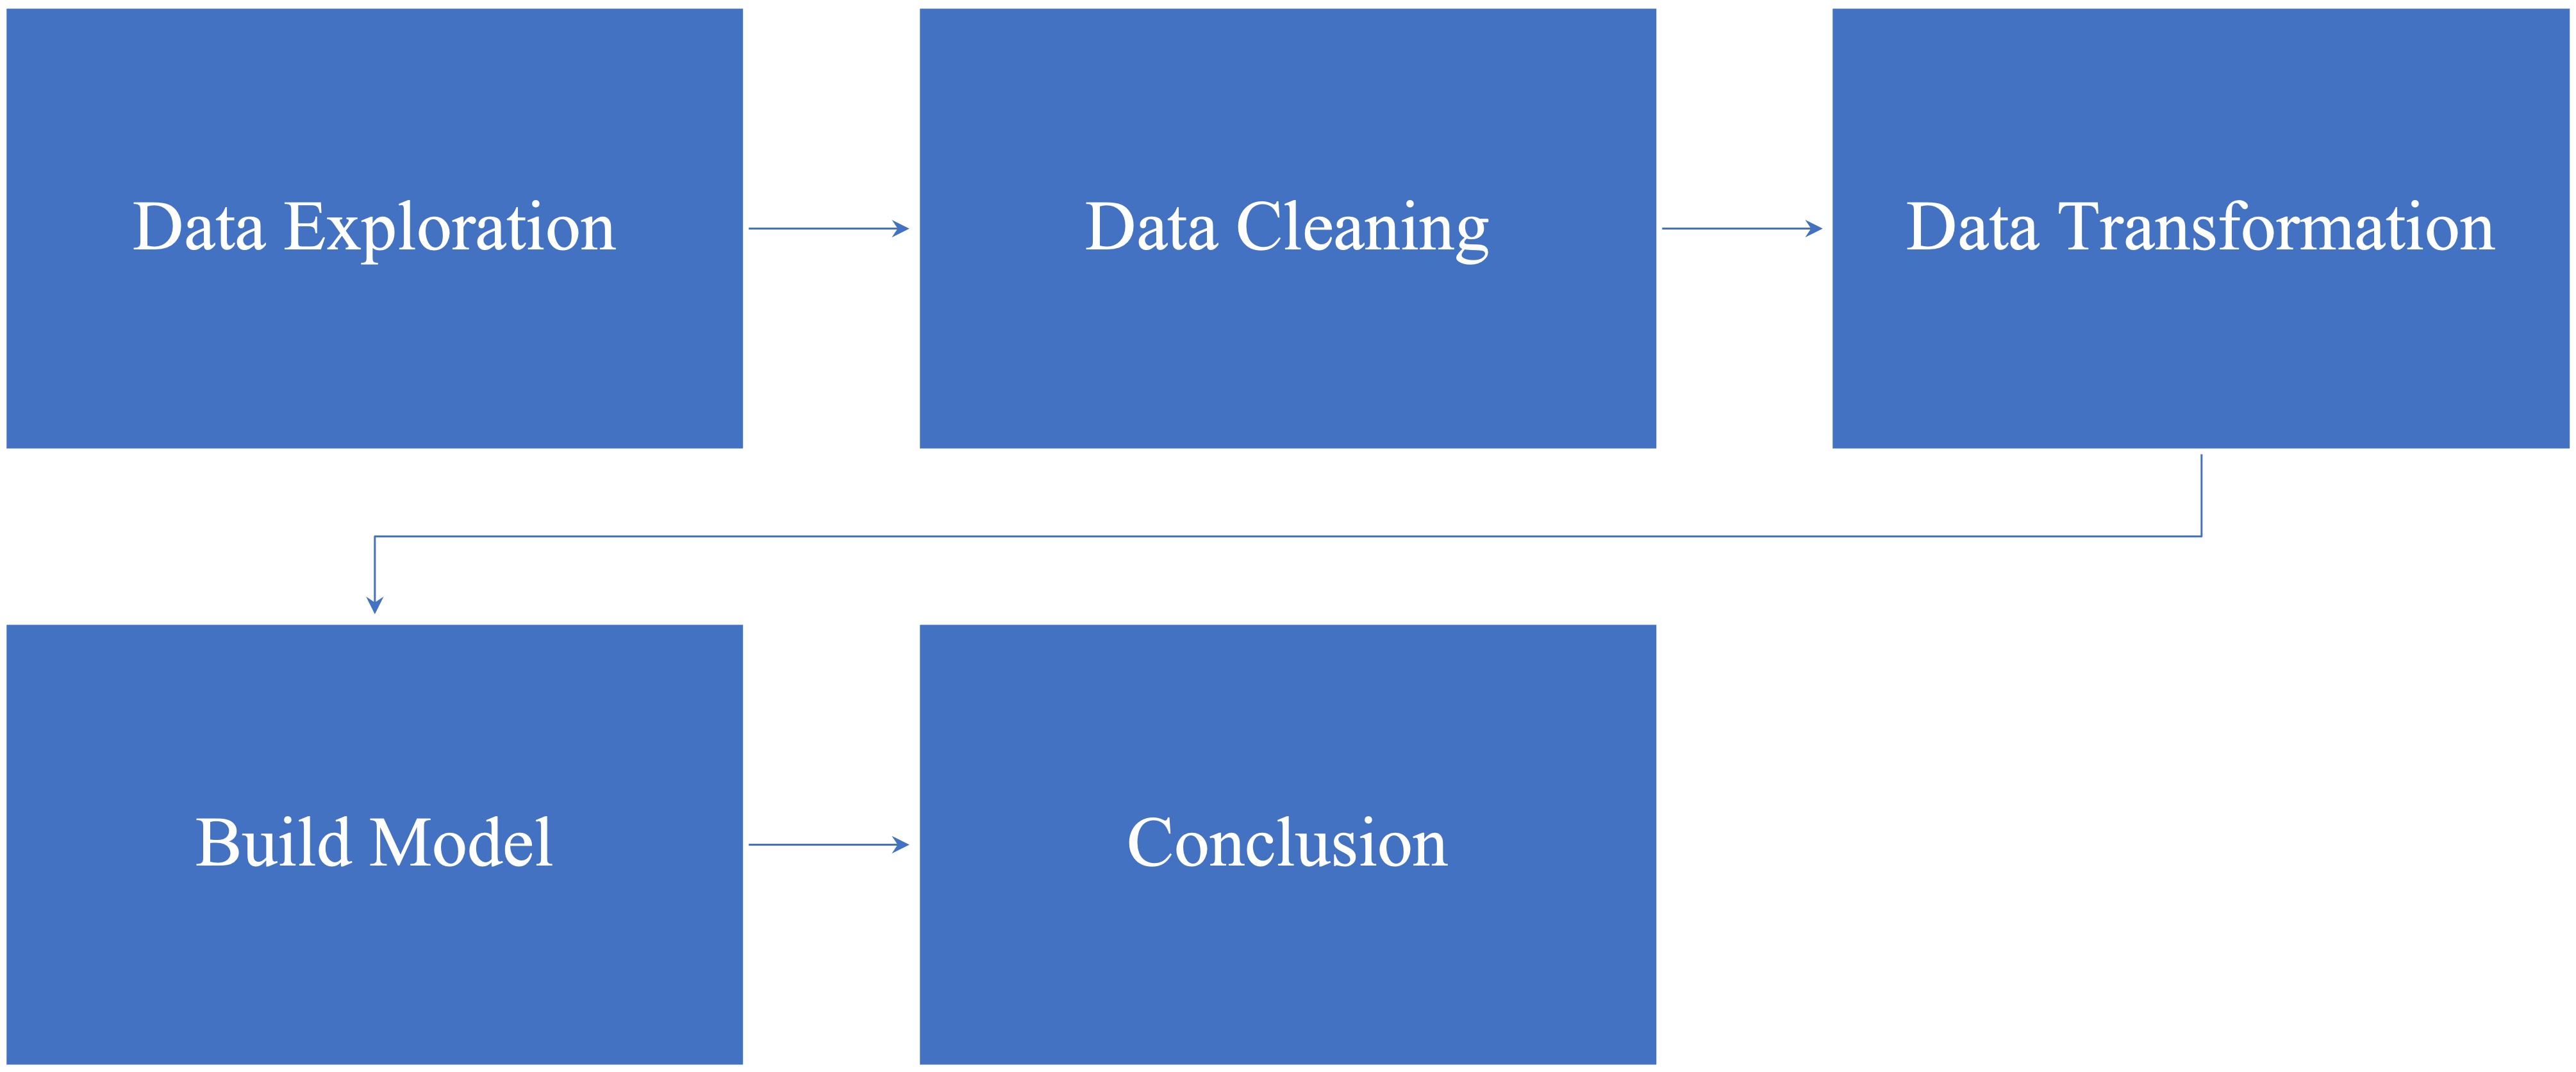

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.show()
from PIL import Image

 ## Data Exploration

In [53]:
df=pd.read_csv('US CENSUS INCOME Dataset.csv')

In [54]:
df.shape

(200000, 41)

In [55]:
df.head(2)

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,23,Private,43,22,Some college but no degree,0,College or university,Never married,Education,Adm support including clerical,...,Peru,Peru,United-States,Native- Born in the United States,0,Not in universe,2,30,95,0
1,24,Private,34,2,Bachelors degree(BA AB BS),0,Not in universe,Never married,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,94,0


In [56]:
df.columns

Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'num_person_Worked_employer', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'business_or_self_employed', 'fill_questionnaire_veteran_admin',
       'veterans_benefits', 'weeks_worked_in_year', 'year', 'income_level'],
      dtype='object')

In [57]:
df['income_level']

0         0
1         0
2         1
3         0
4         0
         ..
199995    0
199996    1
199997    0
199998    0
199999    0
Name: income_level, Length: 200000, dtype: int64

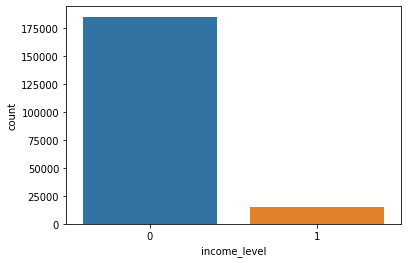

In [58]:
sns.countplot(x='income_level', data=df)
plt.show()

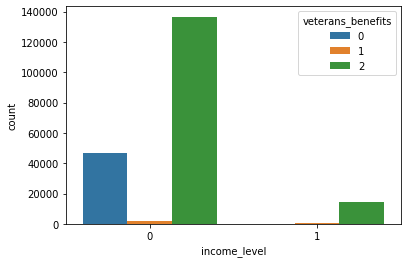

In [59]:
# now comparing veteran benefits in relation to income_level
sns.countplot(x='income_level', data=df, hue='veterans_benefits')
plt.show()

In [60]:
df['education']

0                     Some college but no degree
1                     Bachelors degree(BA AB BS)
2         Masters degree(MA MS MEng MEd MSW MBA)
3                           High school graduate
4                                       Children
                           ...                  
199995                                  Children
199996       Associates degree-occup /vocational
199997                                11th grade
199998                Bachelors degree(BA AB BS)
199999                                  Children
Name: education, Length: 200000, dtype: object

In [61]:
df['citizenship']

0         Native- Born in the United States
1         Native- Born in the United States
2         Native- Born in the United States
3         Native- Born in the United States
4         Native- Born in the United States
                        ...                
199995    Native- Born in the United States
199996    Native- Born in the United States
199997    Native- Born in the United States
199998    Native- Born in the United States
199999    Native- Born in the United States
Name: citizenship, Length: 200000, dtype: object

In [62]:
filter_non_native=df.citizenship !='Native- Born in the United States' 
filter_non_native 

0         False
1         False
2         False
3         False
4         False
          ...  
199995    False
199996    False
199997    False
199998    False
199999    False
Name: citizenship, Length: 200000, dtype: bool

In [63]:
df.describe()


,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,34.662495,15.564830,11.326325,54.835700,493.561580,38.921275,212.977630,1.983780,0.177995,1.522860,23.541820,94.499800,0.074360
std,22.225765,18.104961,14.424809,272.034681,5109.900136,277.867944,2062.591247,2.372892,0.557014,0.846346,24.447497,0.500001,0.262357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000
50%,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,10.000000,94.000000,0.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000,0.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               200000 non-null  int64 
 1   class_of_worker                   200000 non-null  object
 2   industry_code                     200000 non-null  int64 
 3   occupation_code                   200000 non-null  int64 
 4   education                         200000 non-null  object
 5   wage_per_hour                     200000 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       200000 non-null  object
 7   marital_status                    200000 non-null  object
 8   major_industry_code               200000 non-null  object
 9   major_occupation_code             200000 non-null  object
 10  race                              200000 non-null  object
 11  hispanic_origin                   199408 non-null  object
 12  se

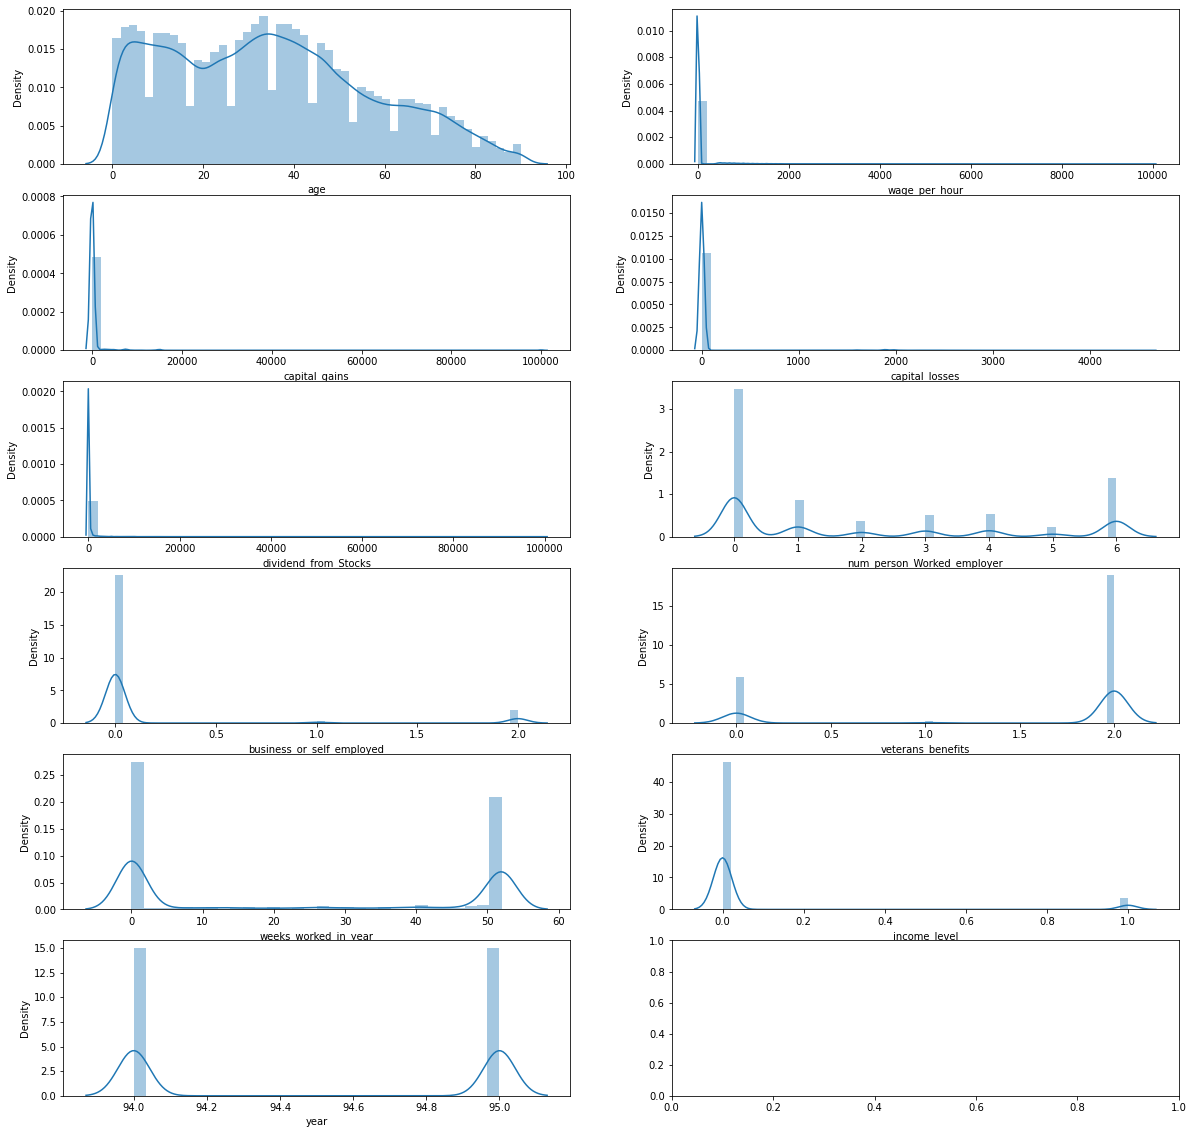

In [65]:
sns.set_style=('dark',{'axes.facecolor':'black'})
f,axes=plt.subplots(6,2, figsize=(20,20))
#sns.set_style('whitegrid')

vis1=sns.distplot(df['age'],ax=axes[0,0])
vis2=sns.distplot(df['wage_per_hour'],ax=axes[0,1])                     
vis3=sns.distplot(df['capital_gains'],ax=axes[1,0])                  
vis4=sns.distplot(df['capital_losses'],ax=axes[1,1])
vis5=sns.distplot(df['dividend_from_Stocks'],ax=axes[2,0])
vis6=sns.distplot(df['num_person_Worked_employer'],ax=axes[2,1])
vis7=sns.distplot(df['business_or_self_employed'],ax=axes[3,0])
vis8=sns.distplot(df['veterans_benefits'],ax=axes[3,1])
vis9=sns.distplot(df['weeks_worked_in_year'],ax=axes[4,0])
vis10=sns.distplot(df['income_level'],ax=axes[4,1])
vis11=sns.distplot(df['year'],ax=axes[5,0])
plt.show()

# Data Cleaning

In [66]:
df.isna().any()

age                                 False
class_of_worker                     False
industry_code                       False
occupation_code                     False
education                           False
wage_per_hour                       False
enrolled_in_edu_inst_lastwk         False
marital_status                      False
major_industry_code                 False
major_occupation_code               False
race                                False
hispanic_origin                      True
sex                                 False
member_of_labor_union               False
reason_for_unemployment             False
full_parttime_employment_stat       False
capital_gains                       False
capital_losses                      False
dividend_from_Stocks                False
tax_filer_status                    False
region_of_previous_residence        False
state_of_previous_residence          True
d_household_family_stat             False
d_household_summary               

In [67]:
missing_values=df.isna().sum()
missing_values

age                                     0
class_of_worker                         0
industry_code                           0
occupation_code                         0
education                               0
wage_per_hour                           0
enrolled_in_edu_inst_lastwk             0
marital_status                          0
major_industry_code                     0
major_occupation_code                   0
race                                    0
hispanic_origin                       592
sex                                     0
member_of_labor_union                   0
reason_for_unemployment                 0
full_parttime_employment_stat           0
capital_gains                           0
capital_losses                          0
dividend_from_Stocks                    0
tax_filer_status                        0
region_of_previous_residence            0
state_of_previous_residence           477
d_household_family_stat                 0
d_household_summary               

In [68]:
missing_values_percentage=((missing_values/len(df))*100)

missing_values_percentage

age                                  0.0000
class_of_worker                      0.0000
industry_code                        0.0000
occupation_code                      0.0000
education                            0.0000
wage_per_hour                        0.0000
enrolled_in_edu_inst_lastwk          0.0000
marital_status                       0.0000
major_industry_code                  0.0000
major_occupation_code                0.0000
race                                 0.0000
hispanic_origin                      0.2960
sex                                  0.0000
member_of_labor_union                0.0000
reason_for_unemployment              0.0000
full_parttime_employment_stat        0.0000
capital_gains                        0.0000
capital_losses                       0.0000
dividend_from_Stocks                 0.0000
tax_filer_status                     0.0000
region_of_previous_residence         0.0000
state_of_previous_residence          0.2385
d_household_family_stat         

Norminal categorical variables that contain missing values 

In [69]:
missing_categorical_data=[var for var in df.columns if df[var].isnull().mean()>0]
missing_categorical_data   

['hispanic_origin',
 'state_of_previous_residence',
 'migration_msa',
 'migration_reg',
 'migration_within_reg',
 'migration_sunbelt',
 'country_father',
 'country_mother',
 'country_self']

In [70]:
print("Number of sub-Categories in: ")
for ColName in df[['hispanic_origin','state_of_previous_residence','migration_msa','migration_reg','migration_sunbelt','country_father',
                   'country_mother','country_self','education']]:
    print("{} = {}".format(ColName,       len(df[ColName].unique())))

Number of sub-Categories in: 
hispanic_origin = 20
state_of_previous_residence = 102
migration_msa = 20
migration_reg = 18
migration_sunbelt = 8
country_father = 86
country_mother = 86
country_self = 86
education = 34


In [ ]:
df['hispanic_origin'].value_counts().plot.bar()
plt.show()

In [ ]:
df['hispanic_origin']

In [ ]:
print(df['hispanic_origin'].mode())
print(df['hispanic_origin'].fillna('All other',inplace=True))
print(df['hispanic_origin'].isnull().sum())


In [ ]:
print(df['state_of_previous_residence'].mode())
print(df['state_of_previous_residence'].fillna('Not in universe',inplace=True))
print(df['state_of_previous_residence'].isnull().sum())

In [19]:
print(df['migration_msa'].mode())
print(df['migration_msa'].fillna('Nonmover',inplace=True))
print(df['migration_msa'].isnull().sum())

0    Nonmover
Name: migration_msa, dtype: object
None
0


In [20]:
print(df['migration_reg'].mode())
print(df['migration_reg'].fillna('Nonmover',inplace=True))
print(df['migration_reg'].isnull().sum())

0    Nonmover
Name: migration_reg, dtype: object
None
0


In [21]:
print(df['migration_within_reg'].mode())
print(df['migration_within_reg'].fillna('Nonmover',inplace=True))
print(df['migration_within_reg'].isnull().sum())

0    Nonmover
Name: migration_within_reg, dtype: object
None
0


In [22]:
print(df['migration_sunbelt'].mode())
print(df['migration_sunbelt'].fillna('Not in universe',inplace=True))
print(df['migration_sunbelt'].isnull().sum())

0    Not in universe
Name: migration_sunbelt, dtype: object
None
0


In [23]:
print(df['country_father'].mode())
print(df['country_father'].fillna('United-States',inplace=True))
print(df['country_father'].isnull().sum())

0    United-States
Name: country_father, dtype: object
None
0


In [24]:
print(df['country_mother'].mode())
print(df['country_mother'].fillna('United-States',inplace=True))
print(df['country_mother'].isnull().sum())

0    United-States
Name: country_mother, dtype: object
None
0


In [25]:
print(df['country_self'].mode())
print(df['country_self'].fillna('United-States',inplace=True))
print(df['country_self'].isnull().sum())

0    United-States
Name: country_self, dtype: object
None
0


In [26]:
missing_values=df.isna().sum()
missing_values

age                                   0
class_of_worker                       0
industry_code                         0
occupation_code                       0
education                             0
wage_per_hour                         0
enrolled_in_edu_inst_lastwk           0
marital_status                        0
major_industry_code                   0
major_occupation_code                 0
race                                  0
hispanic_origin                     592
sex                                   0
member_of_labor_union                 0
reason_for_unemployment               0
full_parttime_employment_stat         0
capital_gains                         0
capital_losses                        0
dividend_from_Stocks                  0
tax_filer_status                      0
region_of_previous_residence          0
state_of_previous_residence         477
d_household_family_stat               0
d_household_summary                   0
migration_msa                         0


# Data Transformation

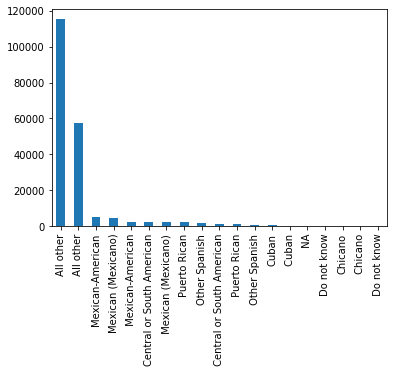

In [27]:
df['hispanic_origin'].value_counts().plot.bar()
plt.show()

In [28]:
df.head(2)

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,23,Private,43,22,Some college but no degree,0,College or university,Never married,Education,Adm support including clerical,...,Peru,Peru,United-States,Native- Born in the United States,0,Not in universe,2,30,95,0
1,24,Private,34,2,Bachelors degree(BA AB BS),0,Not in universe,Never married,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,94,0


In [71]:
education = pd.get_dummies(df['education'], drop_first=True)
enrolled_in_edu_inst_lastwk=pd.get_dummies(df['enrolled_in_edu_inst_lastwk'],drop_first=True)
marital_status=pd.get_dummies(df['marital_status'],drop_first=True)
major_industry_code=pd.get_dummies(df['major_industry_code'],drop_first=True)
major_occupation_code=pd.get_dummies(df['major_occupation_code'],drop_first=True)
country_father=pd.get_dummies(df['country_father'],drop_first=True)
country_mother=pd.get_dummies(df['country_mother'],drop_first=True)
country_self=pd.get_dummies(df['country_self'],drop_first=True)
citizenship=pd.get_dummies(df['citizenship'],drop_first=True)
fill_questionnaire_veteran_admin=pd.get_dummies(df['fill_questionnaire_veteran_admin'],drop_first=True)
class_of_worker=pd.get_dummies(df['class_of_worker'],drop_first=True)
race=pd.get_dummies(df['race'],drop_first=True)
hispanic_origin=pd.get_dummies(df['hispanic_origin'],drop_first=True)
sex=pd.get_dummies(df['sex'],drop_first=True)
member_of_labor_union=pd.get_dummies(df['member_of_labor_union'],drop_first=True)
reason_for_unemployment=pd.get_dummies(df['reason_for_unemployment'],drop_first=True)
full_parttime_employment_stat=pd.get_dummies(df['full_parttime_employment_stat'],drop_first=True)
tax_filer_status=pd.get_dummies(df['tax_filer_status'],drop_first=True)
region_of_previous_residence=pd.get_dummies(df['region_of_previous_residence'],drop_first=True)
state_of_previous_residence=pd.get_dummies(df['state_of_previous_residence'],drop_first=True)
d_household_family_stat=pd.get_dummies(df['d_household_family_stat'],drop_first=True)
d_household_summary=pd.get_dummies(df['d_household_summary'],drop_first=True)
migration_msa=pd.get_dummies(df['migration_msa'],drop_first=True)
migration_reg=pd.get_dummies(df['migration_reg'],drop_first=True)
migration_within_reg=pd.get_dummies(df['migration_within_reg'],drop_first=True)
live_1_year_ago=pd.get_dummies(df['live_1_year_ago'],drop_first=True)
family_members_under_18=pd.get_dummies(df['family_members_under_18'],drop_first=True)

In [72]:
education

,11th grade,12th grade no diploma,1st 2nd 3rd or 4th grade,5th or 6th grade,7th and 8th grade,9th grade,Associates degree-academic program,Associates degree-occup /vocational,Bachelors degree(BA AB BS),Children,...,Associates degree-academic program,Associates degree-occup /vocational,Bachelors degree(BA AB BS),Children,Doctorate degree(PhD EdD),High school graduate,Less than 1st grade,Masters degree(MA MS MEng MEd MSW MBA),Prof school degree (MD DDS DVM LLB JD),Some college but no degree
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
199996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
199997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199998,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [30]:
df = pd.concat([df,education,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,
                 major_occupation_code,country_father,country_mother,country_self,citizenship,
                fill_questionnaire_veteran_admin,class_of_worker,race,hispanic_origin,sex,member_of_labor_union,
                reason_for_unemployment,full_parttime_employment_stat,tax_filer_status,
                region_of_previous_residence,state_of_previous_residence,d_household_family_stat,
                d_household_summary,migration_msa,migration_reg,migration_within_reg,live_1_year_ago,
                family_members_under_18], axis=1)

In [34]:
df.head(2)

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,Yes,Father only present,Mother only present,Neither parent present,Not in universe,Both parents present,Father only present,Mother only present,Neither parent present,Not in universe
0,23,Private,43,22,Some college but no degree,0,College or university,Never married,Education,Adm support including clerical,...,0,0,0,0,0,0,0,0,0,1
1,24,Private,34,2,Bachelors degree(BA AB BS),0,Not in universe,Never married,Finance insurance and real estate,Executive admin and managerial,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# Drop columns with categorical data
"""
Seems we have already created one hot encoding for categorical features now drop the old features so we
dont have duplicates
"""
df.drop(['education','enrolled_in_edu_inst_lastwk','marital_status','major_industry_code','major_occupation_code',
          'country_father','country_mother','country_self','citizenship',
          'fill_questionnaire_veteran_admin','class_of_worker','race','hispanic_origin','sex','member_of_labor_union',
          'reason_for_unemployment','full_parttime_employment_stat','tax_filer_status',
          'region_of_previous_residence','state_of_previous_residence','d_household_family_stat',
         'd_household_summary','migration_msa','migration_reg','migration_within_reg',
          'live_1_year_ago','family_members_under_18'], axis=1, inplace=True)

In [36]:
df.columns

Index(['age', 'industry_code', 'occupation_code', 'wage_per_hour',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'migration_sunbelt', 'num_person_Worked_employer',
       'business_or_self_employed',
       ...
       'Yes', ' Father only present', ' Mother only present',
       ' Neither parent present', ' Not in universe', 'Both parents present',
       'Father only present', 'Mother only present', 'Neither parent present',
       'Not in universe'],
      dtype='object', length=761)

In [37]:
df.head(2)

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,migration_sunbelt,num_person_Worked_employer,business_or_self_employed,...,Yes,Father only present,Mother only present,Neither parent present,Not in universe,Both parents present,Father only present,Mother only present,Neither parent present,Not in universe
0,23,43,22,0,0,0,0,Not in universe,4,0,...,0,0,0,0,0,0,0,0,0,1
1,24,34,2,0,0,0,0,No,4,0,...,0,0,0,0,0,0,0,0,0,1


### Drop one column that is not significant

In [66]:
df['migration_sunbelt']

0                     NaN
1                      No
2         Not in universe
3                     NaN
4                     NaN
               ...       
199995                NaN
199996    Not in universe
199997    Not in universe
199998                NaN
199999                NaN
Name: migration_sunbelt, Length: 200000, dtype: object

In [38]:

df.drop(['migration_sunbelt'],axis=1,inplace=True)

In [39]:
df.head(2)

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,...,Yes,Father only present,Mother only present,Neither parent present,Not in universe,Both parents present,Father only present,Mother only present,Neither parent present,Not in universe
0,23,43,22,0,0,0,0,4,0,2,...,0,0,0,0,0,0,0,0,0,1
1,24,34,2,0,0,0,0,4,0,2,...,0,0,0,0,0,0,0,0,0,1


In [134]:
#Get index of income level column
columns=df.columns
column_name = "income_level"
column_index = columns.get_loc(column_name)
column_index

#Change the position of income level so that it is easy to split

# shift column 'Name' to first position
change_column = df.pop("income_level")
  

df.insert(0, "income_level", change_column)

In [135]:
df

,income_level,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,...,Yes,Father only present,Mother only present,Neither parent present,Not in universe,Both parents present,Father only present,Mother only present,Neither parent present,Not in universe
0,0,23,43,22,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,1
1,0,24,34,2,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,1
2,1,38,34,2,0,0,0,250,4,0,...,1,0,0,0,0,0,0,0,0,1
3,0,33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
199996,1,32,39,19,0,5178,0,0,4,0,...,1,0,0,0,0,0,0,0,0,1
199997,0,18,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
199998,0,45,43,33,0,0,0,200,6,0,...,0,0,0,0,0,0,0,0,0,1


## Build model

In [ ]:
split x and y where x will contain the predictor variables and y will contain the target variable

In [136]:

y=df.iloc[:,0]
X=df.iloc[:,1:768]

In [137]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:

from sklearn.linear_model import LogisticRegression

In [ ]:
Create instance (i.e. object) of LogisticRegression

In [138]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
print(logmodel.coef_)
print(logmodel.intercept_)

[[ 3.41735142e-02 -2.41222775e-03 -5.79266184e-02 -2.56137116e-05
   1.42796256e-04  7.41395486e-04  2.26870527e-04  1.32022224e-02
   6.36145793e-05  7.36290903e-04  8.71036445e-02 -7.18073532e-02
  -1.12555237e-04 -4.78546209e-05 -2.76036421e-05 -5.71172925e-05
  -1.33549236e-04 -9.84947452e-05 -1.45963301e-05 -5.23213177e-05
   9.07359435e-04 -4.02494276e-04  2.14643225e-04 -7.53456838e-04
  -1.54980273e-05  5.60337581e-04  3.16182709e-04 -3.08411230e-04
  -2.92136081e-04 -2.44410427e-04 -6.74177607e-05 -6.78481311e-05
  -1.44763033e-04 -2.52344353e-04 -1.89518632e-04 -2.56756695e-05
  -1.01417617e-04  1.61253281e-03 -8.16052463e-04  4.57539712e-04
  -1.68567140e-03 -3.46431827e-05  1.10512921e-03  6.84935834e-04
  -5.59096752e-04 -1.02447720e-04  8.41843734e-05 -2.49398984e-04
  -1.70828431e-04 -2.00630529e-04 -2.15619709e-05  1.24015004e-03
  -8.05738046e-06 -1.00226841e-03 -8.31137404e-05 -1.40648014e-04
  -1.63923766e-04 -3.87391021e-05  2.02035180e-03 -2.90563471e-05
  -1.99785

In [139]:
predictions = logmodel.predict(X_test)

In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     55510
           1       0.74      0.22      0.34      4490

    accuracy                           0.94     60000
   macro avg       0.84      0.61      0.65     60000
weighted avg       0.92      0.94      0.92     60000



In [141]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tn, fp, fn, tp)
print([tp,fp])
print([fn,tn])

55163 347 3516 974
[974, 347]
[3516, 55163]


In [142]:
Accuracy=((tp+tn)/(tp+tn+fp+fn))*100

In [143]:
print('Accuracy is :',Accuracy)

Accuracy is : 93.56166666666667


# Conclusion